C:\Users\Jerry\AppData\Local\Temp\ipykernel_15988\3072259857.py:65: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


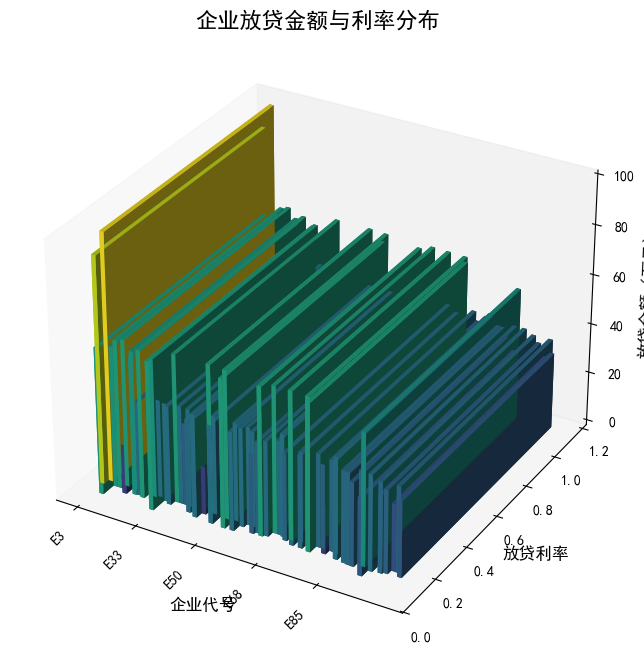

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# 解决中文标题显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为 SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取Excel文件
file_path = "updated_loan_decision_result_with_fluctuations.xlsx"  # 请替换为实际文件路径
df = pd.read_excel(file_path)

# 确保"是否放贷"列正确处理为整数类型
df["是否放贷"] = df["是否放贷"].astype(int)

# 筛选出放贷的企业
df = df[df["是否放贷"] == 1]

# 检查筛选结果是否为空
if df.empty:
    print("筛选后的数据为空，请检查数据文件")
else:
    # 创建企业名称、年份、放贷金额的网格
    企业 = df["企业代号"]
    金额 = df["放贷金额(万元)"]
    利率 = df["放贷利率"]

    x = np.arange(len(企业))
    y = 利率
    z = np.zeros(len(企业))

    dx = np.ones(len(企业))
    dy = np.ones(len(企业))
    dz = 金额

    # 创建3D柱状图
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制柱状图
    ax.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(dz / max(dz)))

    # 设置标题（解决中文标题问题）
    ax.set_title("企业放贷金额与利率分布", fontsize=16)

    # 去掉网格线
    ax.grid(False)

    # 设置横坐标标签，显示部分企业代号
    step = max(1, len(企业) // 5)  # 控制显示的间隔
    ax.set_xticks(x[::step])
    ax.set_xticklabels(企业[::step], rotation=45, ha='right', fontsize=10)


    

    # 设置标签和标题
    ax.set_xlabel("企业代号", fontsize=12)
    ax.set_ylabel("放贷利率", fontsize=12)
    ax.set_zlabel("放贷金额（万元）", fontsize=12)

    # 显示图形
    plt.tight_layout()
    plt.show()





C:\Users\Jerry\AppData\Local\Temp\ipykernel_15988\3823814818.py:83: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


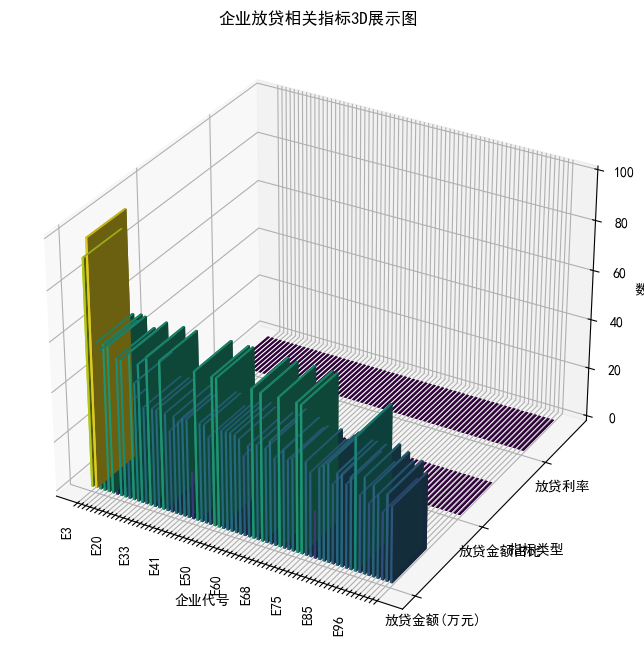

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#----------------------------------------------------------
# 读取数据
# 假设您的excel文件名称为 updated_loan_decision_result_with_fluctuations.xlsx
# 且包含列：企业代号、是否放贷、放贷金额(万元)、放贷金额占比、放贷利率
#----------------------------------------------------------
data = pd.read_excel("updated_loan_decision_result_with_fluctuations.xlsx")

# 如果您只想绘制有实际放贷的企业，可进行过滤(可选)
data = data[data['是否放贷'] == 1]

# 获取企业列表
enterprises = data['企业代号'].unique()
num_enterprises = len(enterprises)

# 我们想显示的指标列表
metrics = ['放贷金额(万元)', '放贷金额占比', '放贷利率']
num_metrics = len(metrics)

# 构建一个数值矩阵 Z，行对应企业，列对应指标
Z = np.zeros((num_enterprises, num_metrics))
for i, e in enumerate(enterprises):
    # 假设每个企业对应一行数据，如果有多行需要根据规则聚合，这里假设取平均或合计(根据需求自行调整)
    e_data = data[data['企业代号'] == e]
    # 这里假设直接取平均值（如有多行可根据需要更改为mean、sum等）
    Z[i, 0] = e_data['放贷金额(万元)'].mean()
    Z[i, 1] = e_data['放贷金额占比'].mean()
    Z[i, 2] = e_data['放贷利率'].mean()

# X轴：企业，Y轴：指标类别，Z轴：数值
X = np.arange(num_enterprises)
Y = np.arange(num_metrics)
X, Y = np.meshgrid(X, Y)

X = X.ravel()
Y = Y.ravel()
Z_flat = Z.T.ravel()  # 将Z转置后拉平，使得Z_flat与X、Y对应

# 每个bar的宽度和深度
dx = 0.5
dy = 0.5

# 配色：可根据数值大小或指标类别自定义，这里简单使用一个colormap
norm = plt.Normalize(Z_flat.min(), Z_flat.max())
colors = cm.viridis(norm(Z_flat))

#----------------------------------------------------------
# 绘图部分
#----------------------------------------------------------

# 设置中文字体（请根据系统情况调整字体名称，如SimHei黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.bar3d(X, Y, np.zeros_like(Z_flat), dx, dy, Z_flat, color=colors, shade=True)

# 为了让横轴的企业代号过多时不至于太密集，我们可以只显示部分标签
show_every_n = max(1, num_enterprises // 10)
display_enterprises = [e if i % show_every_n == 0 else "" for i, e in enumerate(enterprises)]

ax.set_xticks(np.arange(num_enterprises))
ax.set_yticks(np.arange(num_metrics))
ax.set_xticklabels(display_enterprises, rotation=90)
ax.set_yticklabels(metrics)

ax.set_xlabel("企业代号")
ax.set_ylabel("指标类型")
ax.set_zlabel("数值")

ax.set_title("企业放贷相关指标3D展示图")

# 调整观察角度
ax.view_init(elev=30, azim=-60)

plt.tight_layout()
plt.show()


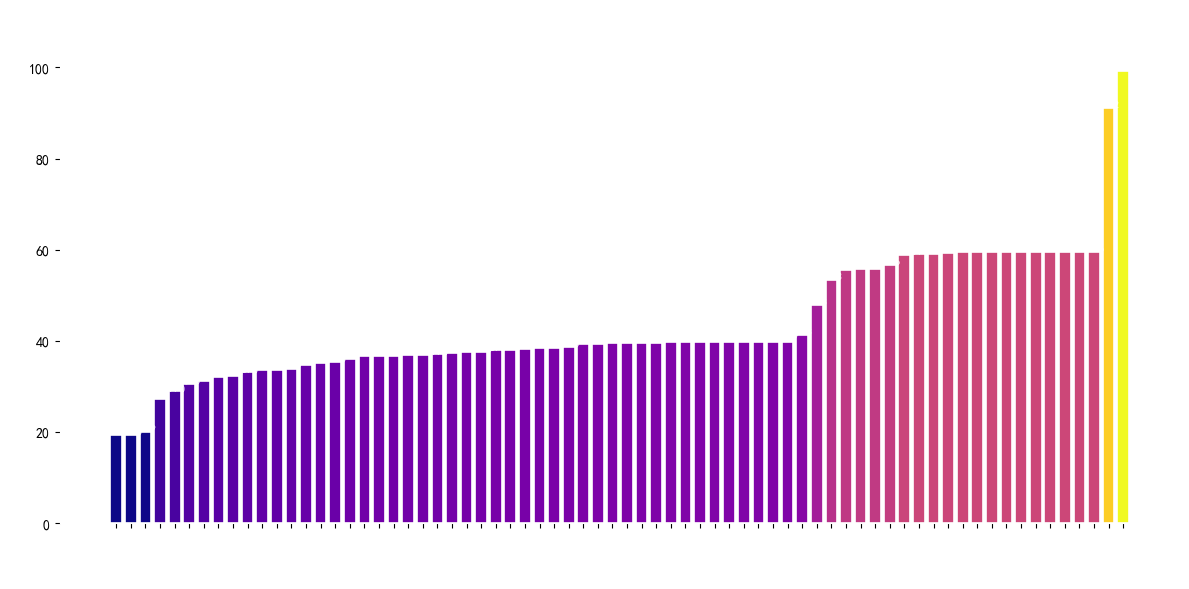

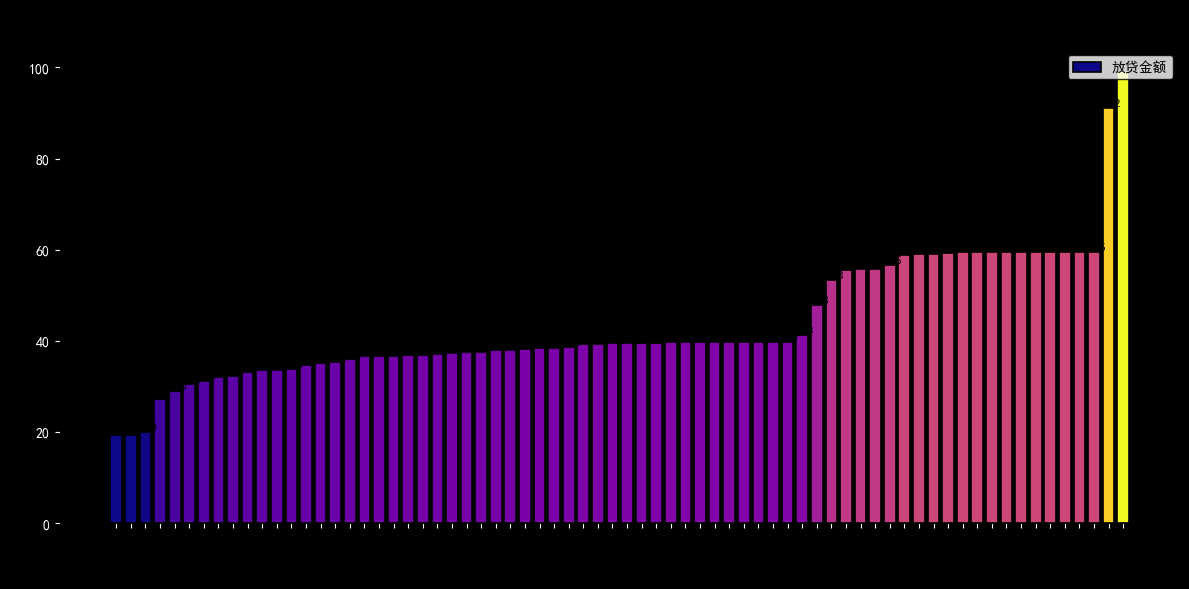

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import font_manager as fm

# 设置中文字体（确保您的系统中有相应的字体）
# Windows系统可以尝试 'SimHei' 或指定路径
font_path = "C:/Windows/Fonts/simhei.ttf"  # 替换为您系统中中文字体的路径
zh_font = fm.FontProperties(fname=font_path)

# 读取数据
data = pd.read_excel("updated_loan_decision_result_with_fluctuations.xlsx")

# 只选出有放贷的企业
df = data[data['是否放贷'] == 1]

# 准备数据
enterprises = df['企业代号'].values
loan_amounts = df['放贷金额(万元)'].values

# 排序（可选）按放贷金额从大到小排序，使图更有层次
sort_idx = np.argsort(loan_amounts)
enterprises = enterprises[sort_idx]
loan_amounts = loan_amounts[sort_idx]

# 配置 Matplotlib 默认中文字体
plt.rcParams['font.family'] = zh_font.get_name()
plt.rcParams['axes.unicode_minus'] = False

# 第一张图：深色主题
fig, ax = plt.subplots(figsize=(12, 6))

# 使用深色主题
plt.style.use('dark_background')

# 绘制条形图
bars = ax.bar(enterprises, loan_amounts, color='none', edgecolor='white', linewidth=1.2)

# 为每个bar添加渐变色填充
cmap = plt.get_cmap('plasma')
norm = plt.Normalize(min(loan_amounts), max(loan_amounts))
for bar, val in zip(bars, loan_amounts):
    grad_color = cmap(norm(val))
    bar.set_facecolor(grad_color)

# 设置X轴标签旋转，使得企业代号易读
plt.xticks(rotation=90, color='white', fontproperties=zh_font)
ax.set_ylabel("放贷金额(万元)", color='white', fontproperties=zh_font)
ax.set_xlabel("企业代号", color='white', fontproperties=zh_font)

# 设置标题
ax.set_title("各企业放贷金额对比", fontsize=16, color='white', pad=20, fontproperties=zh_font)

# 去除多余边框
for spine in ax.spines.values():
    spine.set_color('white')

# 显示数值标签（可选）
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.1f}', 
            ha='center', va='bottom', color='white', fontsize=8)

plt.tight_layout()
plt.show()

# 第二张图：默认主题（白色背景）
fig, ax = plt.subplots(figsize=(12, 6))

# 使用默认主题
plt.style.use('default')

# 绘制条形图
bars = ax.bar(enterprises, loan_amounts, color='none', edgecolor='black', linewidth=1.2)
for bar, val in zip(bars, loan_amounts):
    grad_color = cmap(norm(val))
    bar.set_facecolor(grad_color)

# 设置X轴标签旋转，使得企业代号易读
plt.xticks(rotation=90, color='black', fontproperties=zh_font)
ax.set_ylabel("放贷金额(万元)", color='black', fontproperties=zh_font)
ax.set_xlabel("企业代号", color='black', fontproperties=zh_font)

# 设置标题
ax.set_title("各企业放贷金额对比", fontsize=16, color='black', pad=20, fontproperties=zh_font)

# 去除多余边框
for spine in ax.spines.values():
    spine.set_color('black')

# 显示数值标签（可选）
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.1f}', 
            ha='center', va='bottom', color='black', fontsize=8)

# 添加图注
ax.legend(["放贷金额"], loc='upper right', fontsize=10, facecolor='white', edgecolor='black', prop=zh_font)

# 显示图形
plt.tight_layout()
plt.show()


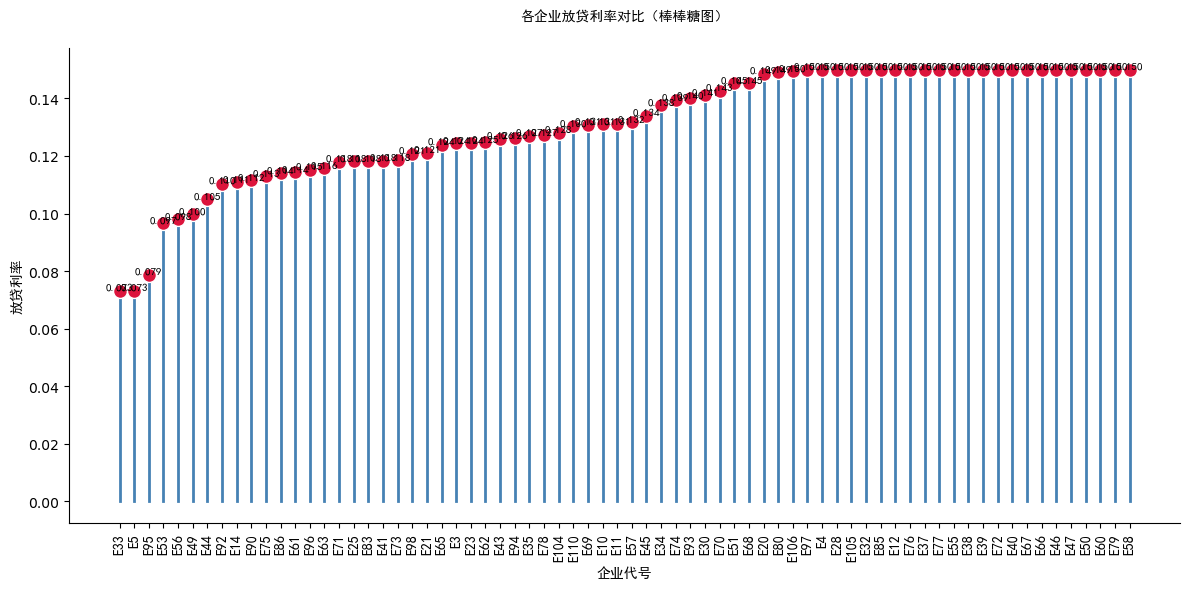

In [32]:
import matplotlib.font_manager as fm

# 设置中文字体
font_path = "C:/Windows/Fonts/simhei.ttf"  # Windows系统黑体字体路径
zh_font = fm.FontProperties(fname=font_path)

# 使用设置好的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

fig, ax = plt.subplots(figsize=(12, 6))

# 准备放贷利率数据（基于df）
# 如果与上次排序保持一致可重复使用上面的sort_idx进行同步排序，也可重新从df中选择
rates = df['放贷利率'].values
ent_for_rates = df['企业代号'].values

# 如果需要排序则执行下列两行
sort_idx_r = np.argsort(rates)
ent_for_rates = ent_for_rates[sort_idx_r]
rates = rates[sort_idx_r]

# 使用纯白背景
plt.style.use('default')
ax.set_facecolor('white')  # 纯白背景

# X轴为企业，Y轴为利率值
x_positions = np.arange(len(ent_for_rates))

# 绘制“棒棒糖”线
for i, val in enumerate(rates):
    ax.plot([x_positions[i], x_positions[i]], [0, val], color='steelblue', linewidth=2)

# 在顶端绘制圆点
ax.scatter(x_positions, rates, color='crimson', s=100, zorder=3, edgecolors='white', linewidth=1)

# 设置刻度
ax.set_xticks(x_positions)
ax.set_xticklabels(ent_for_rates, rotation=90, fontproperties=zh_font)

ax.set_ylabel("放贷利率", fontproperties=zh_font)
ax.set_xlabel("企业代号", fontproperties=zh_font)
ax.set_title("各企业放贷利率对比（棒棒糖图）", fontsize=16, pad=20, fontproperties=zh_font)

# 去掉顶部和右侧框线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 添加数据标签（可选）
for i, val in enumerate(rates):
    ax.text(x_positions[i], val, f'{val:.3f}', ha='center', va='bottom', color='black', fontsize=8, fontproperties=zh_font)

plt.tight_layout()
plt.show()


## 对比数据图生成

C:\Users\Jerry\AppData\Local\Temp\ipykernel_21904\905082347.py:65: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


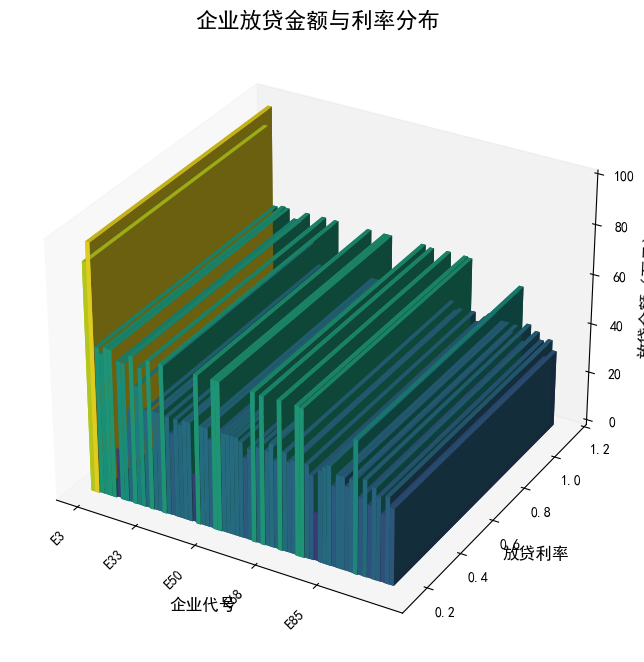

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

# 解决中文标题显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为 SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 读取Excel文件
file_path = "updated_loan_decision_result.xlsx"  # 请替换为实际文件路径
df = pd.read_excel(file_path)

# 确保"是否放贷"列正确处理为整数类型
df["是否放贷"] = df["是否放贷"].astype(int)

# 筛选出放贷的企业
df = df[df["是否放贷"] == 1]

# 检查筛选结果是否为空
if df.empty:
    print("筛选后的数据为空，请检查数据文件")
else:
    # 创建企业名称、年份、放贷金额的网格
    企业 = df["企业代号"]
    金额 = df["放贷金额(万元)"]
    利率 = df["放贷利率"]

    x = np.arange(len(企业))
    y = 利率
    z = np.zeros(len(企业))

    dx = np.ones(len(企业))
    dy = np.ones(len(企业))
    dz = 金额

    # 创建3D柱状图
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制柱状图
    ax.bar3d(x, y, z, dx, dy, dz, color=plt.cm.viridis(dz / max(dz)))

    # 设置标题（解决中文标题问题）
    ax.set_title("企业放贷金额与利率分布", fontsize=16)

    # 去掉网格线
    ax.grid(False)

    # 设置横坐标标签，显示部分企业代号
    step = max(1, len(企业) // 5)  # 控制显示的间隔
    ax.set_xticks(x[::step])
    ax.set_xticklabels(企业[::step], rotation=45, ha='right', fontsize=10)


    

    # 设置标签和标题
    ax.set_xlabel("企业代号", fontsize=12)
    ax.set_ylabel("放贷利率", fontsize=12)
    ax.set_zlabel("放贷金额（万元）", fontsize=12)

    # 显示图形
    plt.tight_layout()
    plt.show()